## **TIME SERIES ANALYSIS**


### **LIBRARIES FOR TIME SERIES ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams

### **LOAD DATA INTO A DATAFRAME**

In [2]:
df = pd.read_csv('passengers.txt')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.to_datetime(df['Month']) # convert to datetime
df.set_index('Month', inplace=True) # set index to month

Text(0, 0.5, 'Passengers')

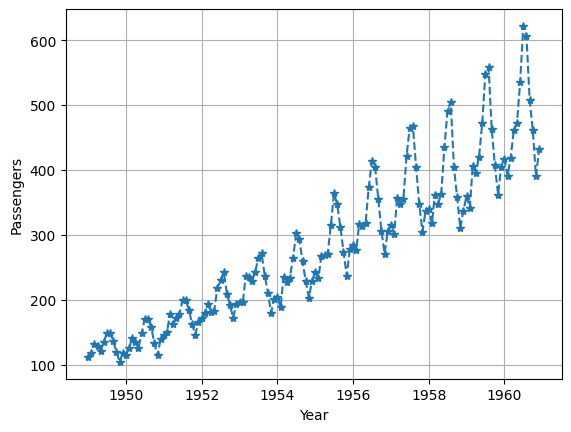

In [4]:
plt.plot(df.index, df['Passengers'], marker='*', linestyle='--');
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [5]:
df.isnull().values.any() # check for missing values

False

In [6]:
df_copy = df.copy() # makes a copy of the dataframe
row = df_copy.sample(frac=0.1, random_state=0) # randomly sample 10% of the data
row['Passengers'] = np.nan # set 'Passengers' to NaN

In [7]:
df_copy.loc[row.index, 'Passengers'] = row['Passengers'] # replace the values in the original dataframe with NaN
df_copy.isnull().sum() # check for missing values

Passengers    14
dtype: int64

### **FILLING MISSING VALUES**

In [8]:
df_copy_ffill = df_copy.fillna(method='ffill') # forward fill
df_copy_ffill.isnull().sum()

C:\Users\Aduragbemi\AppData\Local\Temp\ipykernel_6156\2548779162.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_ffill = df_copy.fillna(method='ffill') # forward fill


Passengers    0
dtype: int64

In [9]:
df_copy_bfill = df_copy.fillna(method='bfill') # backward fill
df_copy_bfill.isnull().sum()

C:\Users\Aduragbemi\AppData\Local\Temp\ipykernel_6156\3037775556.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_bfill = df_copy.fillna(method='bfill') # backward fill


Passengers    0
dtype: int64

In [10]:
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward') # linear interpolation forward
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [11]:
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward') # linear interpolation backward
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

### **DOWNSAMPLING AND UPSAMPLING**

In [12]:
df_quarterly = df_copy.resample('3M').mean() # resample to quarterly data

C:\Users\Aduragbemi\AppData\Local\Temp\ipykernel_6156\1453004511.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_quarterly = df_copy.resample('3M').mean() # resample to quarterly data


In [13]:
df_daily = df_copy.resample('D').mean() # resample to daily data

Text(0.5, 1.0, 'Upsampling')

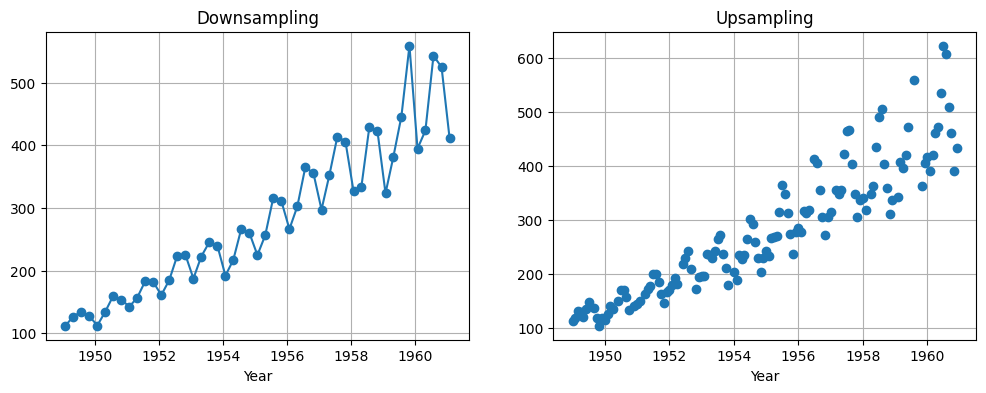

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(df_quarterly.index, df_quarterly['Passengers'], marker='o', linestyle='-')
plt.grid()
plt.xlabel('Year')
plt.title('Downsampling')

plt.subplot(1, 2, 2)
plt.plot(df_daily.index, df_daily['Passengers'], marker='o', linestyle='-')
plt.grid()
plt.xlabel('Year')
plt.title('Upsampling')

### **SMOOTHING**

In [15]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean() # 12-month moving average

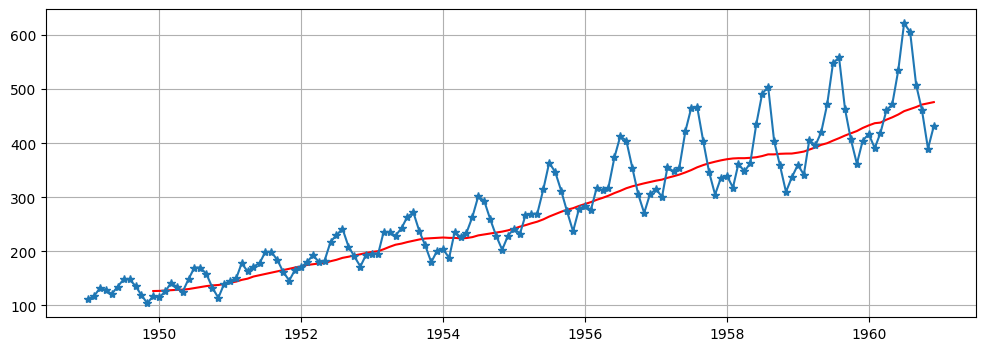

In [16]:
plt.figure(figsize=(12, 4))
plt.grid();
plt.plot(MA.index, MA.values, linestyle='-', color='red');
plt.plot(df.index, df['Passengers'], marker='*', linestyle='-');

### **TIME SERIES SPECIFIC EXPLORATORY METHODS**

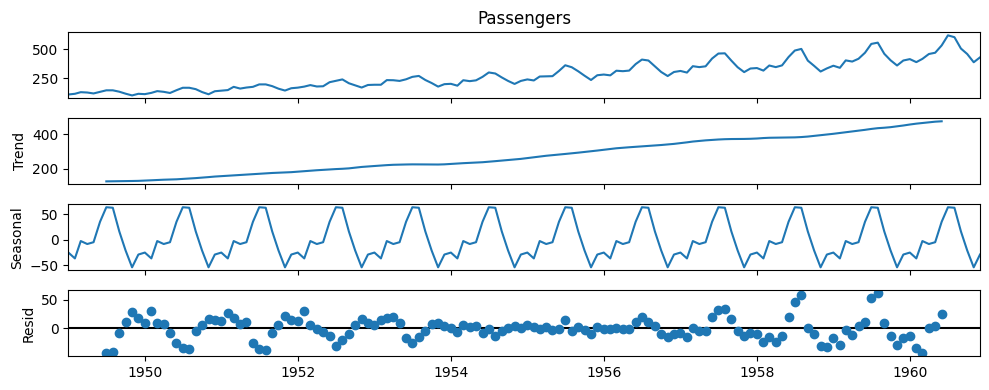

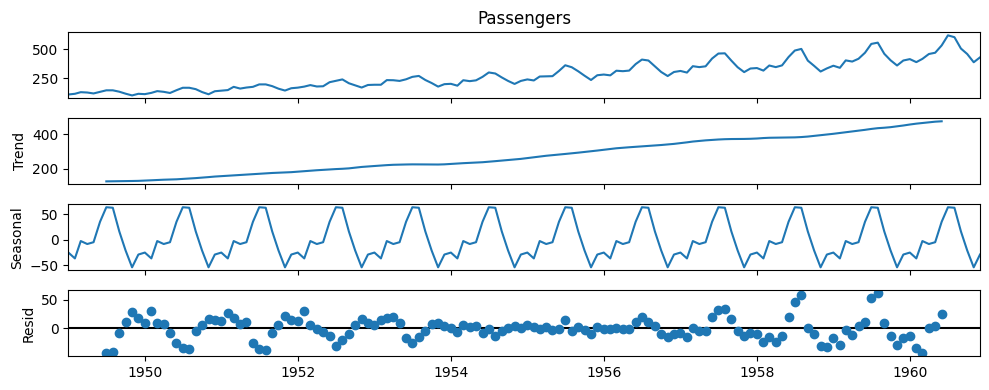

In [17]:
rcParams['figure.figsize'] = 10, 4
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()

### **ADF TEST**

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No of lags used: {adf_result[2]}')
print(f'No of observations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
No of lags used: 13
No of observations used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


### **TRANSFORMATION AND DIFFERENCING**

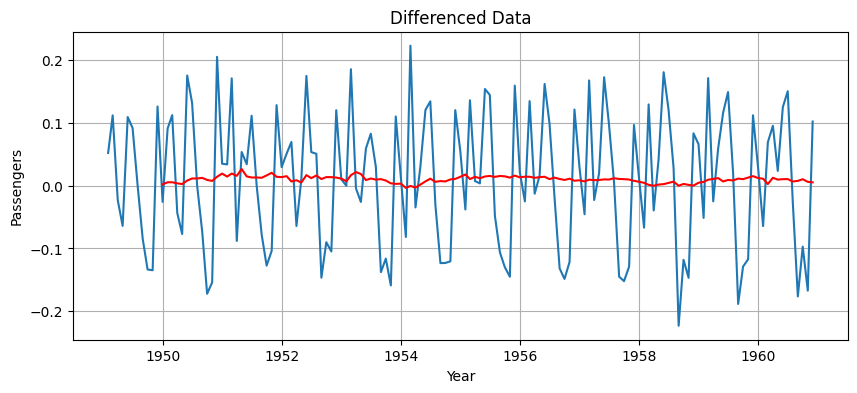

In [19]:
df_log = np.log(df)
df_diff = df_log.diff(periods = 1)
plt.plot(df_diff.index, df_diff.Passengers, '-');
plt.plot(df_diff.rolling(12).mean(), color='red');
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Differenced Data')
plt.grid()

### **TIME SERIES FORECASTING USING STOCHASTIC MODEL**

Text(0.5, 1.0, 'Partial Autocorrelation Plot')

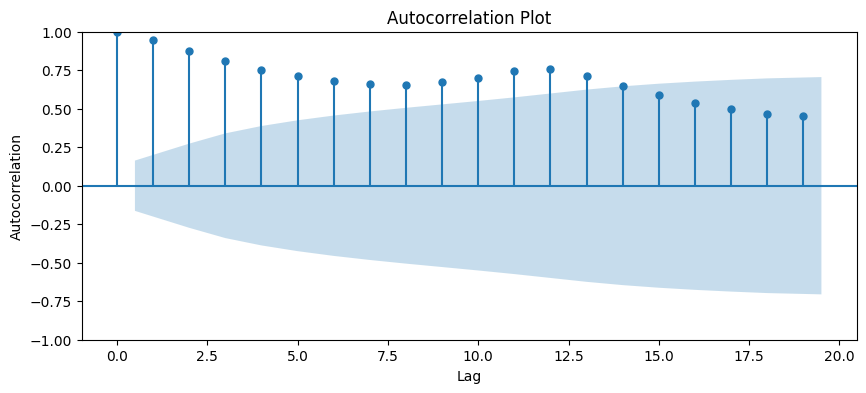

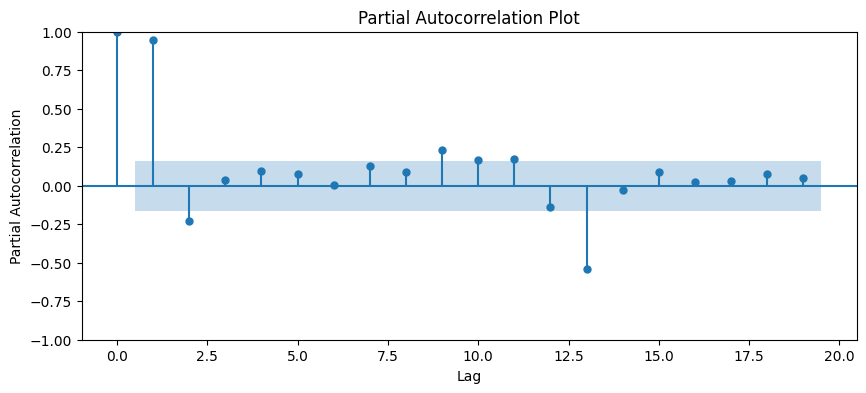

In [24]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation
plot_acf(df['Passengers'], lags=range(0, 20));
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')

# Plot partial autocorrelation
plot_pacf(df['Passengers'], lags=range(0, 20));
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')

c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


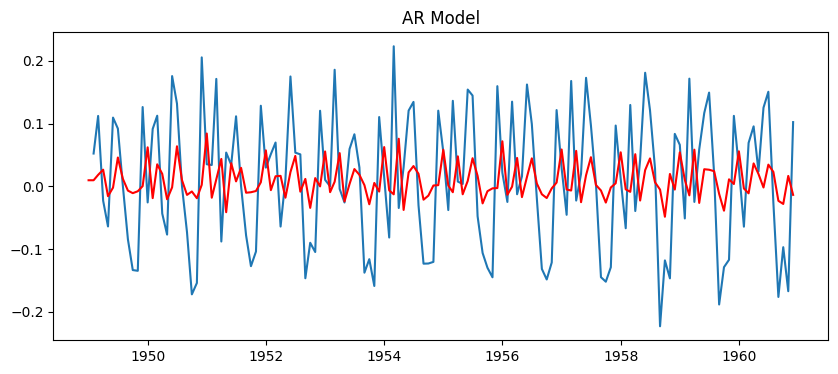

In [28]:
from statsmodels.tsa.arima.model import ARIMA  
#(p,d,q)  
AR_model = ARIMA(df_diff, order=(2 , 0 , 0 ))  
AR_model_results = AR_model.fit()  
plt.plot(df_diff);
plt.plot(AR_model_results.fittedvalues, color= 'red');
plt.title('AR Model');

c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


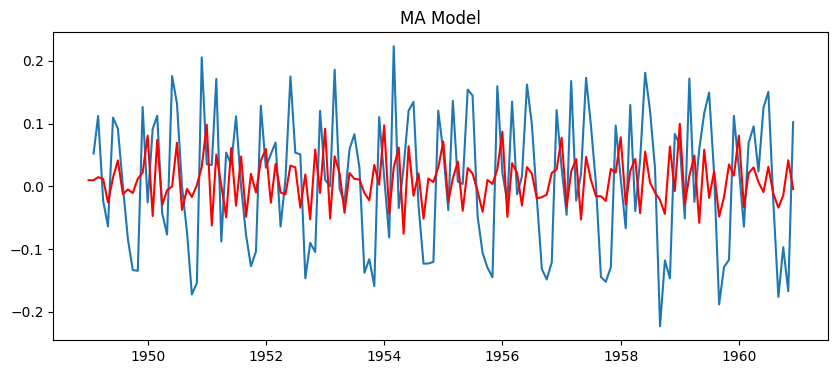

In [29]:
MA_model = ARIMA(df_diff, order=(0 , 0 , 2 ))  
MA_model_results = MA_model.fit()  
plt.plot(df_diff);
plt.plot(MA_model_results.fittedvalues, color= 'red' );
plt.title('MA Model');

c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


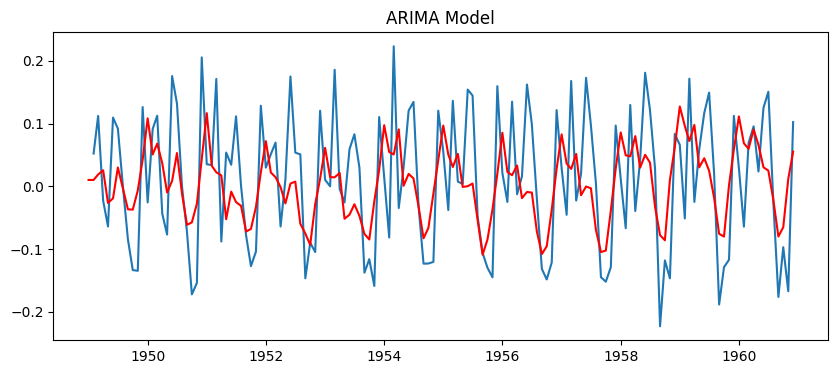

In [30]:
ARIMA_model = ARIMA(df_diff, order=( 2 , 0 , 1 ))  
ARIMA_results = ARIMA_model.fit()  
plt.plot(df_diff); 
plt.plot(ARIMA_results.fittedvalues, color= 'red' );
plt.title('ARIMA Model');